In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df=pd.read_csv(r'C:\Users\Rahul Airan\Desktop\Skill Development\Project\Diabetes-Prediction-using-AI\diabetes.csv')

In [3]:
# Show first five observations
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Exploratory Data Analysis

In [4]:
# Returning dimensions of dataframe
df.shape

(768, 9)

In [5]:
# Get Summary of Dataframe 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
# Returning no. of missing values in each column
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
# Get Statistics of Data
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

<AxesSubplot:xlabel='Outcome', ylabel='count'>

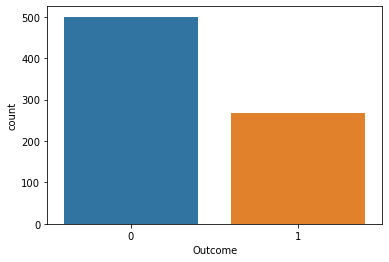

In [9]:
sns.countplot(x='Outcome',data=df)

<AxesSubplot:>

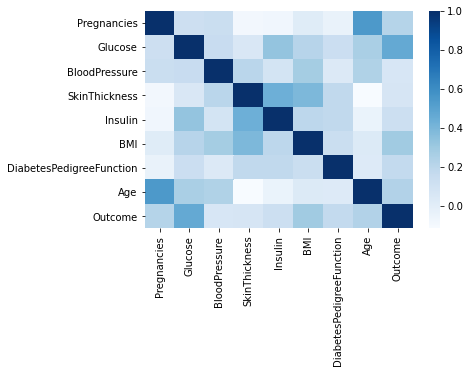

In [10]:
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(),cmap='Blues')

<AxesSubplot:>

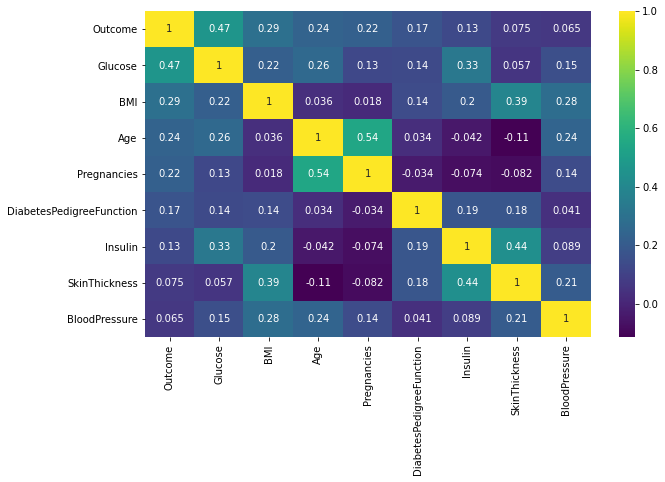

In [11]:
#Outcome Correlation Matrix
k = 9 #number of variables for heatmap
cols = df.corr().nlargest(k, 'Outcome')['Outcome'].index
cm = df[cols].corr()
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, cmap = 'viridis')

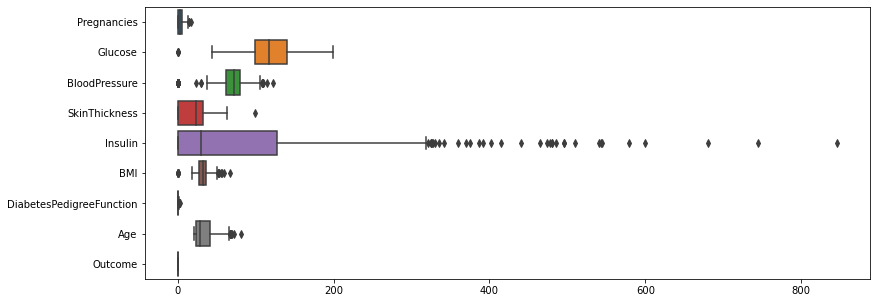

In [12]:
plt.figure(figsize=(13,5))
sns.boxplot(data=df,orient='h')
plt.show()

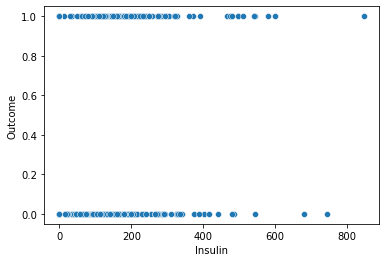

In [13]:
sns.scatterplot(x=df['Insulin'],y=df['Outcome']) #Valid Outlier
plt.show()

C:\Users\Rahul Airan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Rahul Airan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Rahul Airan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\U

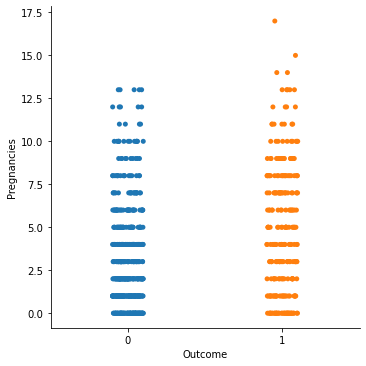

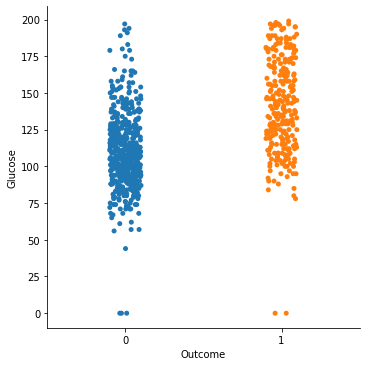

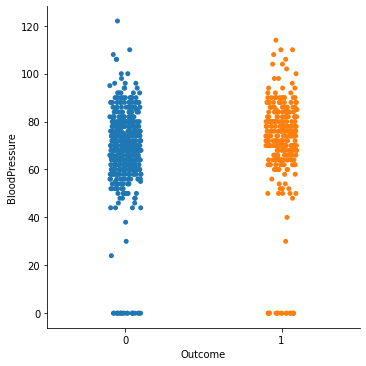

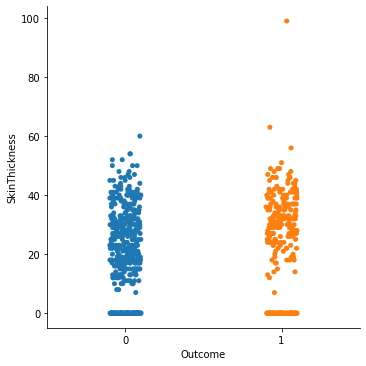

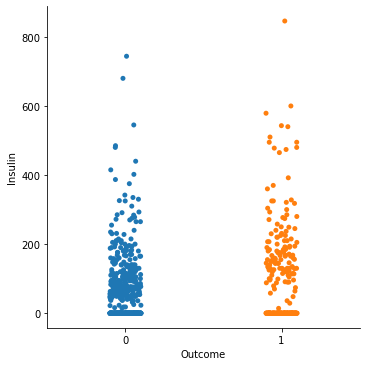

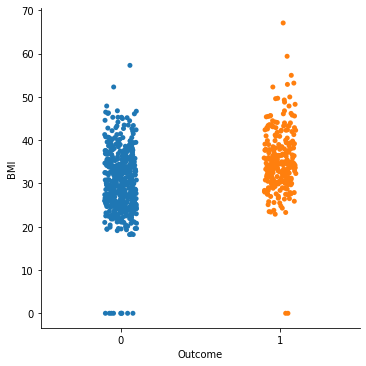

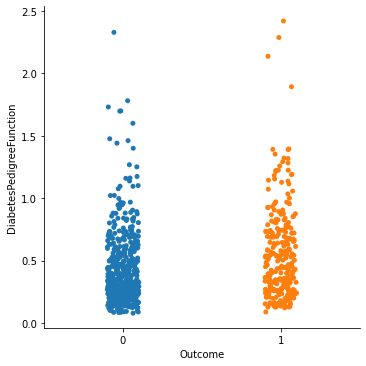

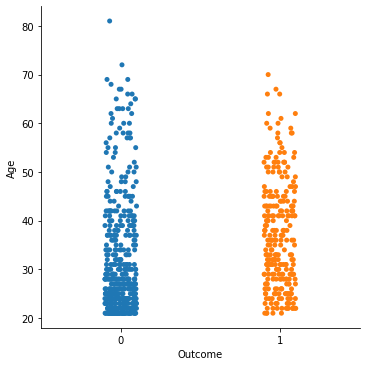

In [14]:
for col in df.columns:
    if col != "Outcome":
        sns.catplot("Outcome", col, data = df)


# Replacing 0 with Mean with respective columns

In [15]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [16]:
#Replacing 0 by Nan
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']]=df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [17]:
# Again, getting no. of missing values in each column 

df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

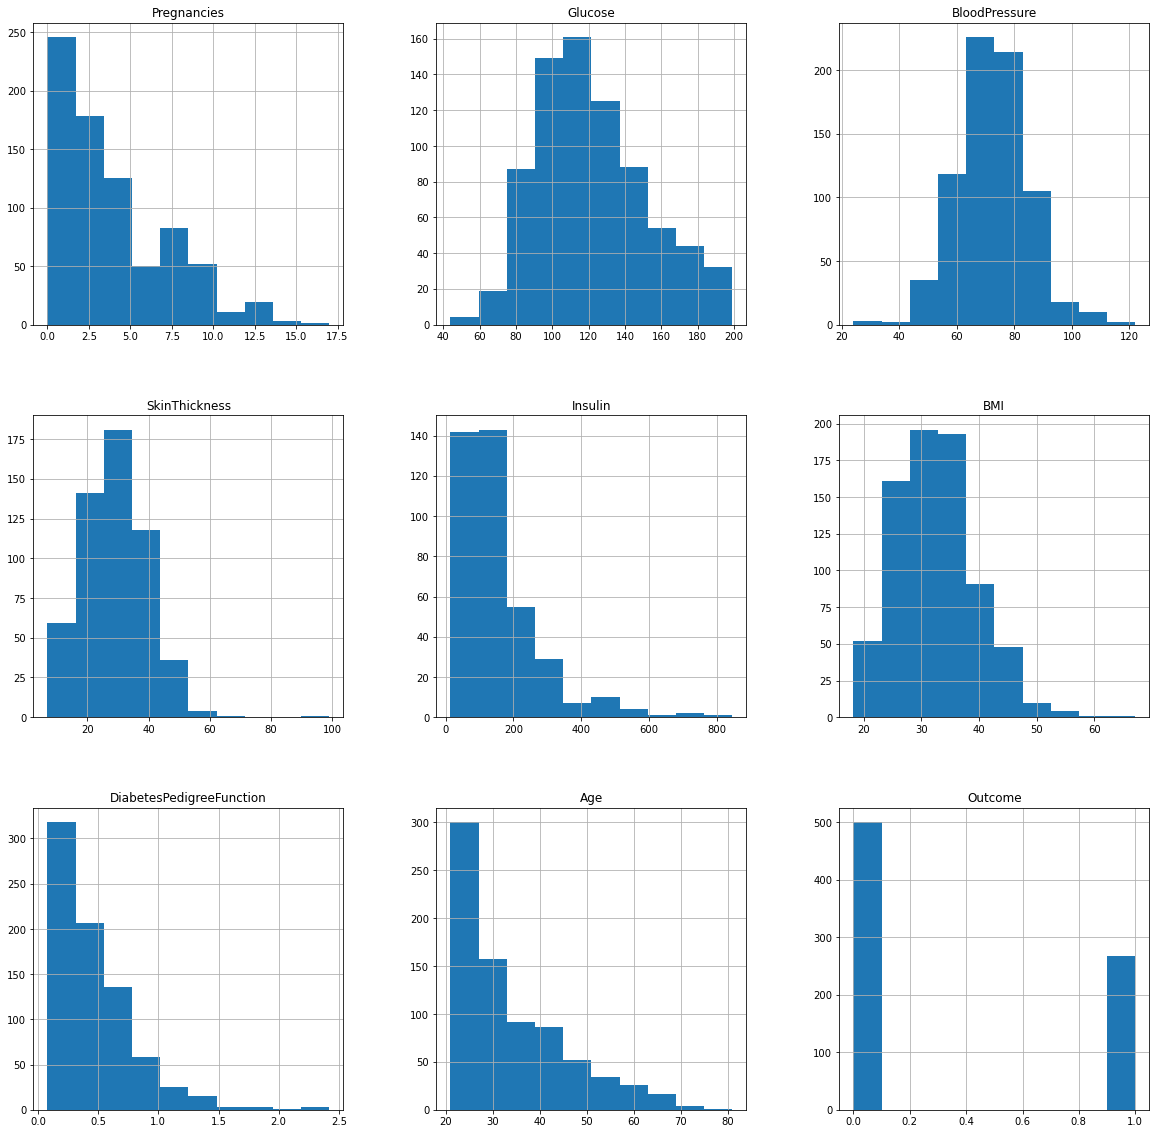

In [18]:
# Data Visualization to understand Data Distribution Before filling NaN values 
p = df.hist(figsize = (20,20))

In [19]:
#Filling Nan Values

df['Glucose'].fillna(df['Glucose'].median(), inplace = True)
df['BloodPressure'].fillna(df['BloodPressure'].median(), inplace = True)
df['SkinThickness'].fillna(df['SkinThickness'].median(), inplace = True)
df['Insulin'].fillna(df['Insulin'].median(), inplace = True)
df['BMI'].fillna(df['BMI'].mean(), inplace = True)

In [20]:
# Checking if missing values in each column is replaced

df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

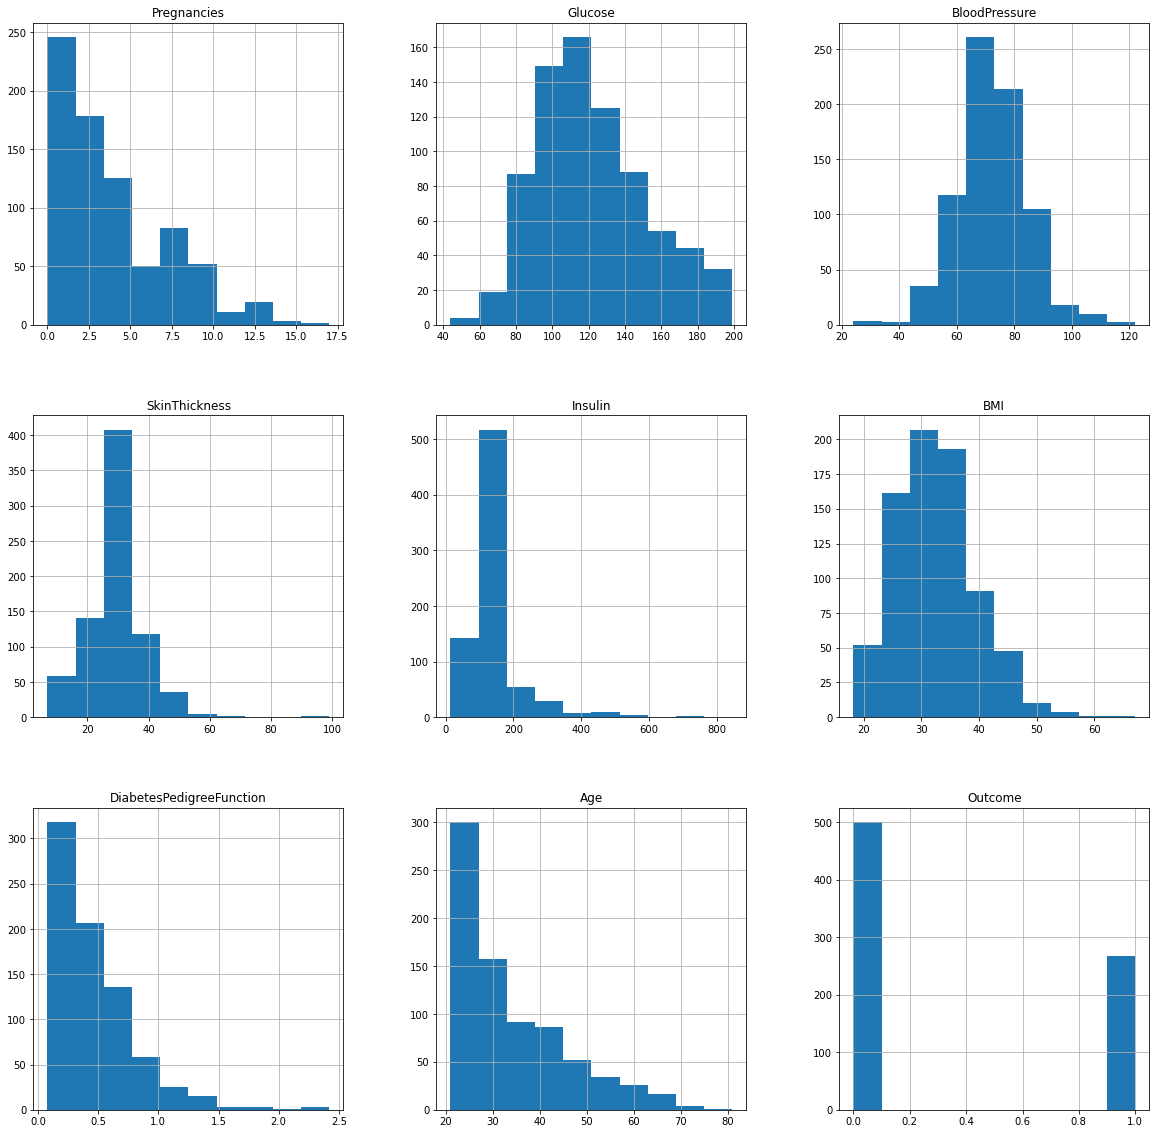

In [21]:
# Data Visualization after Nan Removal
p = df.hist(figsize = (20,20))

In [22]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,29.108073,140.671875,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,8.791221,86.383060,6.875151,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


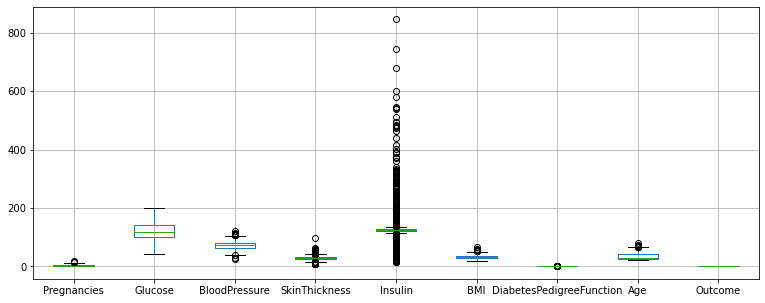

In [24]:
df.boxplot(figsize=(13,5))
plt.show()

# Splitting of data for training and testing

In [25]:
X=df.drop('Outcome',axis=1)

In [26]:
X.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,29.108073,140.671875,32.457464,0.471876,33.240885
std,3.369578,30.438286,12.096642,8.791221,86.383060,6.875151,0.331329,11.760232
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.400000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [27]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63
764,2,122.0,70.0,27.0,125.0,36.8,0.340,27
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30
766,1,126.0,60.0,29.0,125.0,30.1,0.349,47


In [28]:
Y=df['Outcome']

In [29]:
Y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train , X_test , Y_train , Y_test = train_test_split(X,Y,test_size=0.20,random_state=9,shuffle=True)

In [32]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
476,2,105.0,80.0,45.0,191.0,33.7,0.711,29
448,0,104.0,64.0,37.0,64.0,33.6,0.510,22
518,13,76.0,60.0,29.0,125.0,32.8,0.180,41
221,2,158.0,90.0,29.0,125.0,31.6,0.805,66
453,2,119.0,72.0,29.0,125.0,19.6,0.832,72
...,...,...,...,...,...,...,...,...
56,7,187.0,68.0,39.0,304.0,37.7,0.254,41
501,3,84.0,72.0,32.0,125.0,37.2,0.267,28
638,7,97.0,76.0,32.0,91.0,40.9,0.871,32
348,3,99.0,62.0,19.0,74.0,21.8,0.279,26


In [33]:
Y_train

476    1
448    1
518    0
221    1
453    0
      ..
56     1
501    0
638    1
348    0
382    0
Name: Outcome, Length: 614, dtype: int64

# Min Max Scalar

In [34]:
#from sklearn.preprocessing import StandardScaler
#std=StandardScaler()

In [35]:
#X_train=std.fit_transform(X_train)
#X_test=std.transform(X_test)

In [36]:
#X_train

In [37]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train our Model

# Logistic Regression

In [38]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [39]:
lr.fit(X_train,Y_train)

LogisticRegression()

In [40]:
Y_pred=lr.predict(X_test)

In [41]:
Y_pred

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0],
      dtype=int64)

In [42]:
Y_test

456    0
260    0
651    0
143    1
666    1
      ..
583    0
586    1
478    0
655    1
32     0
Name: Outcome, Length: 154, dtype: int64

In [43]:
from sklearn.metrics import accuracy_score

In [44]:
accuracy_score(Y_test,Y_pred) * 100

75.32467532467533

In [45]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(Y_test, Y_pred))

0.24675324675324675


# Decision Tree

In [46]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [47]:
dt.fit(X_train,Y_train)

DecisionTreeClassifier()

In [48]:
Y_pred=dt.predict(X_test)

In [49]:
Y_pred

array([1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
      dtype=int64)

In [50]:
Y_test

456    0
260    0
651    0
143    1
666    1
      ..
583    0
586    1
478    0
655    1
32     0
Name: Outcome, Length: 154, dtype: int64

In [51]:
accuracy_score(Y_test,Y_pred)

0.7012987012987013

In [52]:
print(mean_squared_error(Y_test, Y_pred))

0.2987012987012987


# Deep learning

In [53]:
from sklearn.neural_network import MLPClassifier
mlp=MLPClassifier(hidden_layer_sizes=(8,8))

In [54]:
mlp.fit(X_train,Y_train)

C:\Users\Rahul Airan\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(8, 8))

In [55]:
Y_pred=mlp.predict(X_test)

In [56]:
accuracy_score(Y_test,Y_pred)

0.7467532467532467

In [57]:
print(mean_squared_error(Y_test, Y_pred))

0.2532467532467532


# Artificial Neural Network

In [58]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [59]:
from tensorflow.keras import metrics
model = Sequential()

# https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw

model.add(Dense(units=7,activation='relu'))

model.add(Dense(units=7,activation='relu'))
model.add(Dense(units=7,activation='relu'))
model.add(Dense(units=7,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse',metrics=[metrics.mae, metrics.categorical_accuracy])

from tensorflow.keras.callbacks import EarlyStopping

early_stop=EarlyStopping(monitor='val_loss',verbose=1,patience=25)



In [60]:
model.fit(x=X_train,y=Y_train,epochs=600,validation_data=(X_test,Y_test),
         callbacks=[early_stop])

Epoch 1/600
20/20 [==============================] - 3s 59ms/step - loss: 0.2508 - mean_absolute_error: 0.3713 - categorical_accuracy: 1.0000 - val_loss: 0.2311 - val_mean_absolute_error: 0.4054 - val_categorical_accuracy: 1.0000
Epoch 2/600
20/20 [==============================] - 0s 6ms/step - loss: 0.2220 - mean_absolute_error: 0.4133 - categorical_accuracy: 1.0000 - val_loss: 0.2129 - val_mean_absolute_error: 0.4318 - val_categorical_accuracy: 1.0000
Epoch 3/600
20/20 [==============================] - 0s 5ms/step - loss: 0.2133 - mean_absolute_error: 0.4379 - categorical_accuracy: 1.0000 - val_loss: 0.2114 - val_mean_absolute_error: 0.4384 - val_categorical_accuracy: 1.0000
Epoch 4/600
20/20 [==============================] - 0s 4ms/step - loss: 0.2074 - mean_absolute_error: 0.4349 - categorical_accuracy: 1.0000 - val_loss: 0.2103 - val_mean_absolute_error: 0.4318 - val_categorical_accuracy: 1.0000
Epoch 5/600
20/20 [==============================] - 0s 4ms/step - loss: 0.2107 - m

Epoch 37/600
20/20 [==============================] - 0s 4ms/step - loss: 0.1415 - mean_absolute_error: 0.3086 - categorical_accuracy: 1.0000 - val_loss: 0.1732 - val_mean_absolute_error: 0.3330 - val_categorical_accuracy: 1.0000
Epoch 38/600
20/20 [==============================] - 0s 6ms/step - loss: 0.1623 - mean_absolute_error: 0.3354 - categorical_accuracy: 1.0000 - val_loss: 0.1732 - val_mean_absolute_error: 0.3312 - val_categorical_accuracy: 1.0000
Epoch 39/600
20/20 [==============================] - 0s 4ms/step - loss: 0.1488 - mean_absolute_error: 0.3162 - categorical_accuracy: 1.0000 - val_loss: 0.1736 - val_mean_absolute_error: 0.3305 - val_categorical_accuracy: 1.0000
Epoch 40/600
20/20 [==============================] - 0s 4ms/step - loss: 0.1409 - mean_absolute_error: 0.3024 - categorical_accuracy: 1.0000 - val_loss: 0.1738 - val_mean_absolute_error: 0.3293 - val_categorical_accuracy: 1.0000
Epoch 41/600
20/20 [==============================] - 0s 5ms/step - loss: 0.1494

In [61]:
losses=pd.DataFrame(model.history.history)

<AxesSubplot:>

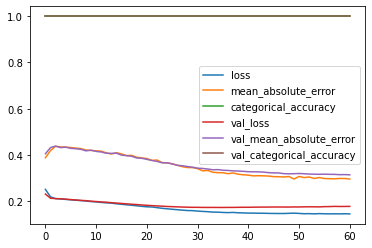

In [62]:
losses.plot()

In [63]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [64]:
predictions=model.predict(X_test)

In [65]:
mean_squared_error(Y_test,predictions)

0.17754313025477278

In [66]:
mean_absolute_error(Y_test,predictions)

0.31414861672303895

In [67]:
model = Sequential()

# https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw

model.add(Dense(units=7,activation='relu'))

model.add(Dense(units=4,activation='relu'))


model.add(Dense(units=1,activation='sigmoid'))

model.compile(optimizer='adam',loss='mse',metrics=[metrics.mae, metrics.categorical_accuracy])


In [68]:
early_stop=EarlyStopping(monitor='val_loss',verbose=1,patience=25)

In [69]:
model.fit(x=X_train,y=Y_train,epochs=600,validation_data=(X_test,Y_test),
         callbacks=[early_stop])

Epoch 1/600
20/20 [==============================] - 1s 21ms/step - loss: 0.2532 - mean_absolute_error: 0.5017 - categorical_accuracy: 1.0000 - val_loss: 0.2429 - val_mean_absolute_error: 0.4906 - val_categorical_accuracy: 1.0000
Epoch 2/600
20/20 [==============================] - 0s 5ms/step - loss: 0.2439 - mean_absolute_error: 0.4908 - categorical_accuracy: 1.0000 - val_loss: 0.2366 - val_mean_absolute_error: 0.4815 - val_categorical_accuracy: 1.0000
Epoch 3/600
20/20 [==============================] - 0s 5ms/step - loss: 0.2379 - mean_absolute_error: 0.4818 - categorical_accuracy: 1.0000 - val_loss: 0.2324 - val_mean_absolute_error: 0.4740 - val_categorical_accuracy: 1.0000
Epoch 4/600
20/20 [==============================] - 0s 6ms/step - loss: 0.2339 - mean_absolute_error: 0.4743 - categorical_accuracy: 1.0000 - val_loss: 0.2288 - val_mean_absolute_error: 0.4670 - val_categorical_accuracy: 1.0000
Epoch 5/600
20/20 [==============================] - 0s 6ms/step - loss: 0.2302 - m

Epoch 37/600
20/20 [==============================] - 0s 4ms/step - loss: 0.1742 - mean_absolute_error: 0.3757 - categorical_accuracy: 1.0000 - val_loss: 0.1815 - val_mean_absolute_error: 0.3797 - val_categorical_accuracy: 1.0000
Epoch 38/600
20/20 [==============================] - 0s 5ms/step - loss: 0.1848 - mean_absolute_error: 0.3871 - categorical_accuracy: 1.0000 - val_loss: 0.1809 - val_mean_absolute_error: 0.3759 - val_categorical_accuracy: 1.0000
Epoch 39/600
20/20 [==============================] - 0s 4ms/step - loss: 0.1760 - mean_absolute_error: 0.3741 - categorical_accuracy: 1.0000 - val_loss: 0.1804 - val_mean_absolute_error: 0.3747 - val_categorical_accuracy: 1.0000
Epoch 40/600
20/20 [==============================] - 0s 5ms/step - loss: 0.1775 - mean_absolute_error: 0.3781 - categorical_accuracy: 1.0000 - val_loss: 0.1799 - val_mean_absolute_error: 0.3751 - val_categorical_accuracy: 1.0000
Epoch 41/600
20/20 [==============================] - 0s 5ms/step - loss: 0.1742

Epoch 73/600
20/20 [==============================] - 0s 4ms/step - loss: 0.1606 - mean_absolute_error: 0.3467 - categorical_accuracy: 1.0000 - val_loss: 0.1691 - val_mean_absolute_error: 0.3443 - val_categorical_accuracy: 1.0000
Epoch 74/600
20/20 [==============================] - 0s 4ms/step - loss: 0.1560 - mean_absolute_error: 0.3373 - categorical_accuracy: 1.0000 - val_loss: 0.1686 - val_mean_absolute_error: 0.3440 - val_categorical_accuracy: 1.0000
Epoch 75/600
20/20 [==============================] - 0s 4ms/step - loss: 0.1607 - mean_absolute_error: 0.3413 - categorical_accuracy: 1.0000 - val_loss: 0.1690 - val_mean_absolute_error: 0.3422 - val_categorical_accuracy: 1.0000
Epoch 76/600
20/20 [==============================] - 0s 4ms/step - loss: 0.1598 - mean_absolute_error: 0.3414 - categorical_accuracy: 1.0000 - val_loss: 0.1684 - val_mean_absolute_error: 0.3446 - val_categorical_accuracy: 1.0000
Epoch 77/600
20/20 [==============================] - 0s 4ms/step - loss: 0.1498

20/20 [==============================] - 0s 3ms/step - loss: 0.1392 - mean_absolute_error: 0.3091 - categorical_accuracy: 1.0000 - val_loss: 0.1672 - val_mean_absolute_error: 0.3318 - val_categorical_accuracy: 1.0000
Epoch 109/600
20/20 [==============================] - 0s 4ms/step - loss: 0.1472 - mean_absolute_error: 0.3209 - categorical_accuracy: 1.0000 - val_loss: 0.1677 - val_mean_absolute_error: 0.3314 - val_categorical_accuracy: 1.0000
Epoch 110/600
20/20 [==============================] - 0s 4ms/step - loss: 0.1470 - mean_absolute_error: 0.3178 - categorical_accuracy: 1.0000 - val_loss: 0.1675 - val_mean_absolute_error: 0.3310 - val_categorical_accuracy: 1.0000
Epoch 111/600
20/20 [==============================] - 0s 4ms/step - loss: 0.1483 - mean_absolute_error: 0.3211 - categorical_accuracy: 1.0000 - val_loss: 0.1681 - val_mean_absolute_error: 0.3296 - val_categorical_accuracy: 1.0000
Epoch 112/600
20/20 [==============================] - 0s 4ms/step - loss: 0.1510 - mean_a

In [70]:
losses=pd.DataFrame(model.history.history)

<AxesSubplot:>

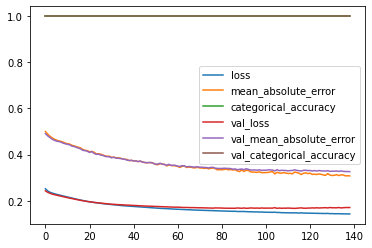

In [71]:
losses.plot()

In [72]:
from sklearn.metrics import mean_squared_error
predictions=model.predict(X_test)
print(mean_squared_error(Y_test,predictions ))

0.1705493161188769


# Random Forest Classifier

In [73]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=1000)
model.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=1000)

In [74]:
Y_pred=model.predict(X_test)

In [75]:
accuracy_score(Y_test,Y_pred)

0.7597402597402597

In [76]:
print(mean_squared_error(Y_test, Y_pred))

0.24025974025974026


# Gradient Boosting Classifier

In [77]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier()

#fiting the model
model.fit(X_train, Y_train)

#prediction
y_pred = model.predict(X_test)

#Accuracy
accuracy_score(Y_test,y_pred)

0.7727272727272727

In [78]:
print(mean_squared_error(Y_test, Y_pred))

0.24025974025974026


# XGBClassifier

In [79]:
#!pip install xgboost
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = round(accuracy_score(Y_test, predictions),5)
accuracy

[20:28:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Rahul Airan\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Rahul Airan\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


0.74026

# KNeighbourClassifier

In [80]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors  import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=8)
clf_ = knn.fit(X_train, Y_train)
y_pred = clf_.predict(X_test)
print('Accuracy is {}'.format(accuracy_score(Y_test,y_pred )))

Accuracy is 0.7207792207792207
